In [1]:
import math
import random
import numpy as np
from typing import List, ClassVar, Callable
import matplotlib.pyplot as plot


In [4]:
class Person:
    def __init__(self, traits: List[float], fitness_function: ClassVar):
        self.fitness: float or None = None
        self.traits = traits

        self.retrospective_coefficient = 0.2
        self.fitness_function: ClassVar = fitness_function

    def calculate_fitness(self):
        self.fitness = self.fitness_function.run(self.traits)

    def improve_traits_from(self, other_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = self.retrospective_coefficient * old_trait + random.random() * (other_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def acquire_traits_from(self, other_person: Person, best_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = old_trait + random.random() * (old_trait - other_person.traits[i]) + random.random() * (best_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def has_better_fitness_than(self, other_person: Person) -> bool:
        return self.fitness_function.person_has_better_fitness_than(other_person, self)


In [5]:
class schwefelFunction:
    @staticmethod
    def run(traits:List)->float:
        return 418.9829 * 30 - sum(i * np.sin(np.sqrt(np.abs(i))) for i in traits)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness


In [6]:
class quarticFunction:
    @staticmethod
    def run(traits:List)->float:
        j=0
        j=j+1
        return sum(((j*(i**4))+round(random.random())) for i in traits)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness

In [7]:
class sphereFunction:
    @staticmethod
    def run(traits:List)->float:
        return sum((i**2) for i in traits)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness

In [8]:
class stepFunction:
    @staticmethod
    def run(traits:List)->float:
        return sum(((math.floor(i+0.5))**2) for i in traits)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness

In [9]:
class sumsquaresFunction:
    @staticmethod
    def run(traits:List)->float:
        j=0
        j=j+1
        return sum(((j*(i**2))) for i in traits)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness

In [10]:
class ZakarovFunction:
    @staticmethod
    def run(traits:List)->float:
        j=0
        j=j+1
        return sum((i**2) for i in traits)+(sum((0.5*j*i) for i in traits)**2)+(sum((0.5*j*i) for i in traits)**4)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness

In [11]:
class PersonMaker:
    def __init__(self, person_count: int, traits_count: int,traits_range_min: float, traits_range_max: float):
        self.person_count = person_count
        self.traits_count = traits_count
        self.traits_range_min = traits_range_min
        self.traits_range_max = traits_range_max
    def make_persons_with_traits_and_fitness_function(self,make_traits: Callable,fitness_function: ClassVar) -> List[Person]:
        persons = []
        for i in range(0, self.person_count):
            traits = make_traits()
            person = Person(traits, fitness_function)
            persons.append(person)
        return persons
    def make_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            traits.append(value)
        return traits
    def make_rounded_off_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            value = math.ceil(value) if math.ceil(value) <self.traits_range_max else math.floor(value)
            traits.append(value)
        return traits


In [12]:
class PopulationGroup:
    def __init__(self, generations: int, person_maker: PersonMaker,fitness_function: ClassVar):
        self.generations = generations
        self.population: List[Person] = []
        self.person_maker = person_maker
        self.best_person: Person or None = None
        self.fitness_function = fitness_function
        self.best_fitness_history = []
    
    def populate(self):
        self.population =self.person_maker.make_persons_with_traits_and_fitness_function(make_traits=self.person_maker.make_rounded_off_traits,fitness_function=self.fitness_function)
        
    def calculate_population_fitness(self):
        for person in self.population:
            person.calculate_fitness()
    
    def find_best_person(self):
        self.best_person = min(self.population, key=lambda x: x.fitness)
        
    def improve_traits(self):
        for person in self.population:
            if person is not self.best_person:
                person.improve_traits_from(self.best_person)
    
    def acquire_traits(self):
        for idx in range(0, len(self.population)):
            person = self.population[idx]
            random_person = self.population[random.choice([i for i in range(0, len(self.population)) if i != idx])]
            if self.fitness_function.person_has_better_fitness_than(other_person=random_person,to_compare_person=person):
                random_person.acquire_traits_from(person, self.best_person)
            else:
                person.acquire_traits_from(random_person, self.best_person)
                
    def run_generations(self):
        self.calculate_population_fitness()
        for _ in range(0, self.generations):
            self.find_best_person()
            self.best_fitness_history.append(self.best_person.fitness)
            self.improve_traits()
            self.find_best_person()
            self.acquire_traits()

    

gbest Values:
[10887.847800931495, 9468.656167768173, 9468.656167768173, 9468.656167768173, 9468.656167768173, 9468.656167768173, 8417.143721139284, 7347.441352989908, 7347.441352989908, 7347.441352989908, 6126.883979730525]


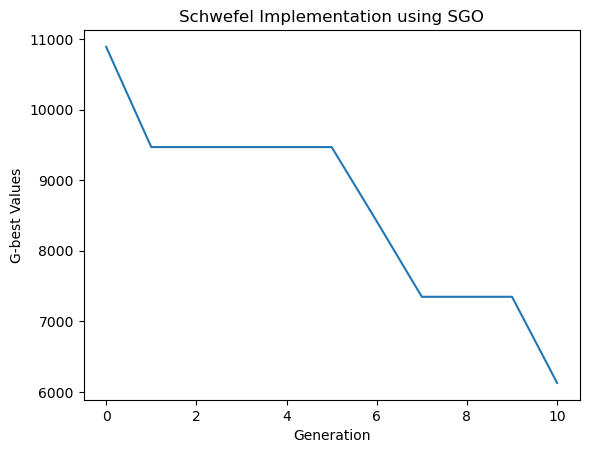

In [22]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=schwefelFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
print("gbest Values:")
print(y_axis)
plot.title('Schwefel Implementation using SGO')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)
plot.draw()
plot.show()


gbest Values:
[25, 14.089577380385654, 11.54522114496298, 10.310379765267081, 10.017920403251328, 9.004086661938006, 9.004086661938006, 9.004086661938006, 9.004086661938006, 7.017349161555038, 7.017349161555038]


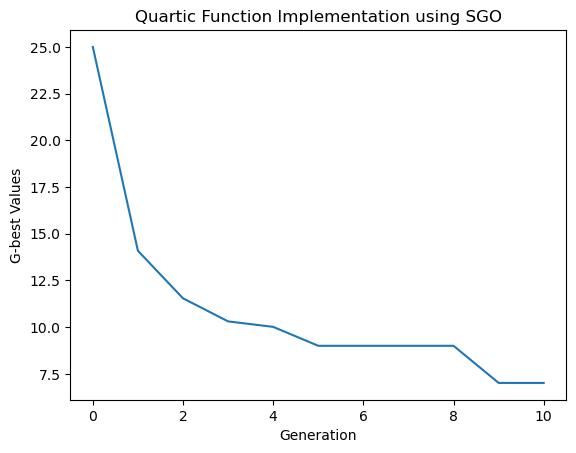

In [20]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -1.28, 1.28),fitness_function=quarticFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
print("gbest Values:")
print(y_axis)
plot.title('Quartic Function Implementation using SGO')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)
plot.draw()
plot.show()


gbest Values:
[82269, 31729.868808141335, 6984.980814784405, 958.4267404894597, 227.37917784655855, 19.382185197375723, 3.3905212182821964, 0.47155008262171105, 0.14150587498544098, 0.01794874442655565, 0.005537605377648821]


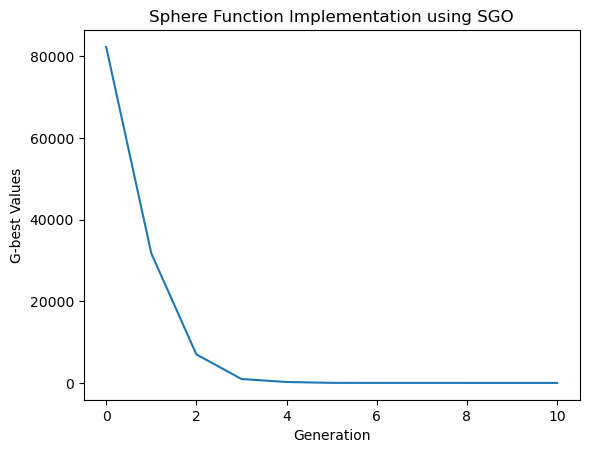

In [16]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -100, 100),fitness_function=sphereFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
print("gbest Values:")
print(y_axis)
plot.title('Sphere Function Implementation using SGO')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)
plot.draw()
plot.show()


gbest Values:
[75689, 25756, 4305, 703, 71, 16, 5, 2, 0, 0, 0]


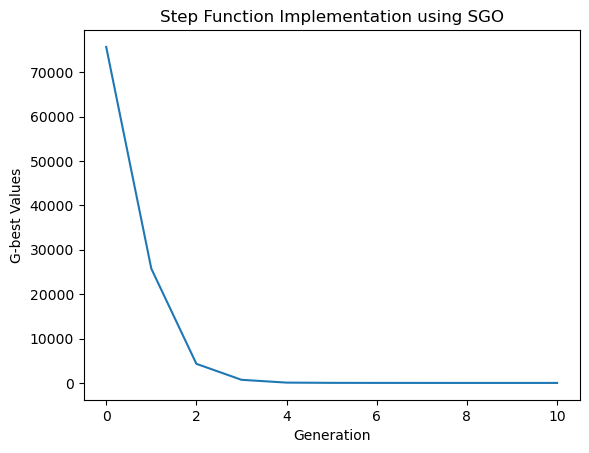

In [14]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -100, 100),fitness_function=stepFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
print("gbest Values:")
print(y_axis)
plot.title('Step Function Implementation using SGO')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)
plot.draw()
plot.show()


gbest Values:
[497, 195.00643179872975, 48.48417681581522, 11.105796980963195, 1.370372691477938, 0.2798793501762823, 0.03987504026227457, 0.013402728817764935, 0.002359831732049323, 0.00019009314290263456, 3.352340151689515e-05]


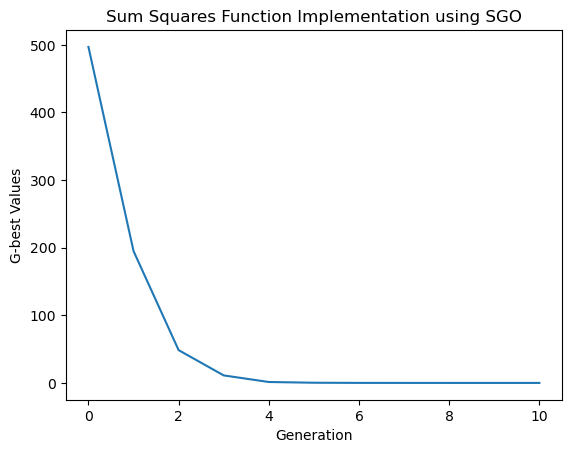

In [18]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -10, 10),fitness_function=sumsquaresFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
print("gbest Values:")
print(y_axis)
plot.title('Sum Squares Function Implementation using SGO')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)
plot.draw()
plot.show()


gbest Values:
[43.3125, 18.624022812734918, 4.333998468839111, 0.5335928533433286, 0.09652919266390225, 0.0013368744960739515, 0.0013368744960739515, 0.0001465539057733597, 7.725692082663236e-05, 6.780402974847963e-06, 1.290871692660638e-06]


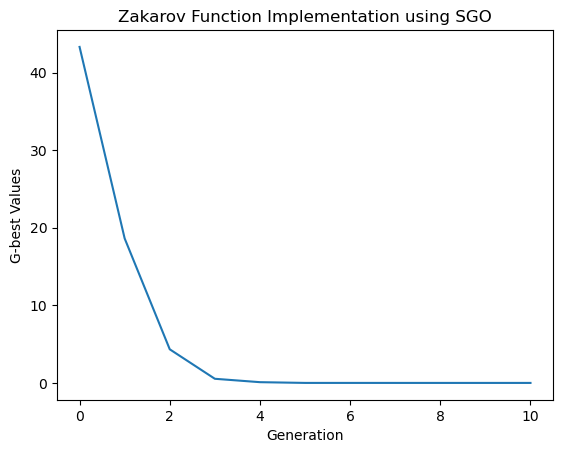

In [24]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 10, -5, 10),fitness_function=ZakarovFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
print("gbest Values:")
print(y_axis)
plot.title('Zakarov Function Implementation using SGO')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)
plot.draw()
plot.show()
